# 1. y= f(시간)

     Pc  온도          시간       감자율
23  1.1  90     0.99928  0.991945
24  1.1  90     5.17030  0.992649
25  1.1  90    24.75300  0.989903
26  1.1  90    51.72900  0.988785
27  1.1  90   116.54000  0.988056
28  1.1  90   170.28000  0.988156
29  1.1  90   311.27000  0.986497
30  1.1  90   504.86000  0.984167
31  1.1  90   864.39000  0.983973
32  1.1  90  1219.30000  0.981931
33  1.1  90  1693.40000  0.981591


C:\Users\SIMBA\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\SIMBA\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\SIMBA\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SIMBA\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SIMBA\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SIMBA\anaconda3\lib\site-packages\matplotlib\backends\

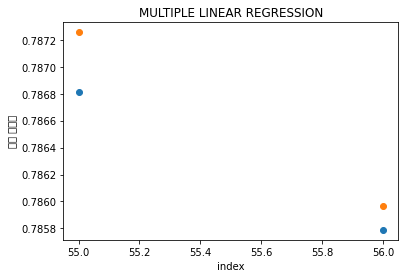

train cv5 R2:[ -0.41146139 -64.0999708    0.5912815           nan          nan]
train cv5 평균점수 : nan
test set R2:  0.7218420469722802
기울기,절편:  [[-0.00553783]] [0.83469037]


In [9]:
import smogn
import seaborn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

raw_data = pd.read_excel("data/polarization loss.xlsx", header=0) 
raw_data.sort_values(by=['온도', '시간'])
#print(raw_data)
raw_data_80 = raw_data.loc[0:22] #23
raw_data_90 = raw_data.loc[23:33] #11
raw_data_110 = raw_data.loc[35:46]#12
raw_data_120 = raw_data.loc[47:56] #10
print(raw_data_90)

"""
## smogn으로 데이터 가공
smogn_data = smogn.smoter(
    data = raw_data_110,
    y = "시간",
    ## phi relevance arguments
    #rel_thres = 0.80,         ## positive real number (0 < R < 1)
    #rel_method = 'auto',      ## string ('auto' or 'manual')
    #rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    #rel_coef = 2.25           ## positive real number (0 < R)
)"""

df = raw_data_120
x = df[['시간']]
y = df[['감자율']]


# 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, shuffle=False) #144 예측

#모델 생성
model = LinearRegression()

x_train = np.log(x_train) # x값 ln(x)으로 전환
x_test = np.log(x_test)
model.fit(x_train, y_train) # model fitting

# K-fold model validation
cv_num =5
arr_score = cross_val_score(model,x_train,y_train,scoring='r2',cv=cv_num)


#예측 비교
y_predict = model.predict(x_test)
plt.scatter(y_test.index, y_predict)#예측 감자율
plt.scatter(y_test.index, y_test) #실제 감자율
plt.xlabel("index")
plt.ylabel("예측 감자율")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

print(f"train cv{cv_num} R2:{arr_score}")
print(f'train cv{cv_num} 평균점수 : {arr_score.mean()}')
print("test set R2: ", model.score(x_test, y_test))
print("기울기,절편: ", model.coef_,model.intercept_)

# 2. y= f(시간,온도)

In [6]:
import smogn
import seaborn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

raw_data = pd.read_excel("data/polarization loss - time.xlsx", header=0) 
raw_data.sort_values(['감자율'],ascending =False)
raw_data

,Pc,온도,시간,감자율
0,1.1,80,0.99495,0.998968
1,1.1,90,0.99928,0.991945
2,1.1,100,1.00490,0.955634
3,1.1,80,4.64080,0.998434
4,1.1,110,4.98740,0.948756
5,1.1,90,5.17030,0.992649
6,1.1,110,23.42300,0.943628
7,1.1,80,23.71500,0.997413
8,1.1,80,24.32700,0.993354
9,1.1,120,24.67700,0.818851
